## Importações

In [1]:

import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [2]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(h.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

Epoch 1/40
18/18 [==============================] - 1s 10ms/step - loss: 1.9984 - accuracy: 0.2383 - val_loss: 1.9066 - val_accuracy: 0.2605
Epoch 2/40
18/18 [==============================] - 0s 3ms/step - loss: 1.7988 - accuracy: 0.3664 - val_loss: 1.7665 - val_accuracy: 0.3782
Epoch 3/40
18/18 [==============================] - 0s 2ms/step - loss: 1.6482 - accuracy: 0.4711 - val_loss: 1.6381 - val_accuracy: 0.4328
Epoch 4/40
18/18 [==============================] - 0s 2ms/step - loss: 1.5032 - accuracy: 0.5542 - val_loss: 1.5122 - val_accuracy: 0.5084
Epoch 5/40
18/18 [==============================] - 0s 2ms/step - loss: 1.3574 - accuracy: 0.6227 - val_loss: 1.3835 - val_accuracy: 0.5588
Epoch 6/40
18/18 [==============================] - 0s 2ms/step - loss: 1.2207 - accuracy: 0.6661 - val_loss: 1.2638 - val_accuracy: 0.5798
Epoch 7/40
18/18 [==============================] - 0s 2ms/step - loss: 1.0975 - accuracy: 0.6968 - val_loss: 1.1626 - val_accuracy: 0.6008
Epoch 8/40
18/18 [=

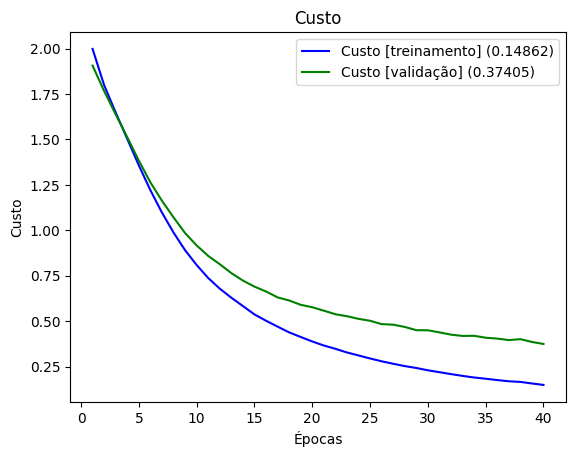

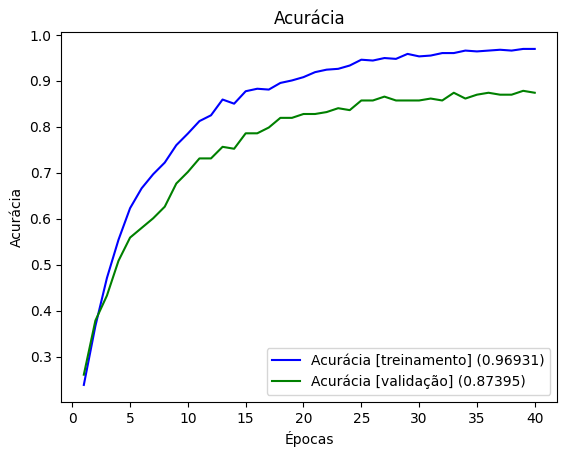

8/8 [==============================] - 0s 787us/step
Acurácia: 87.39%
Matriz de confusão:
[[27  1  0  0  0  0  0  0]
 [ 1 20  0  1  1  0  0  2]
 [ 0  0 28  0  2  3  0  3]
 [ 1  3  0 22  1  0  1  0]
 [ 1  1  1  0 30  1  0  0]
 [ 0  0  0  1  1 30  0  0]
 [ 0  0  0  1  0  2 24  0]
 [ 0  0  0  0  1  0  0 27]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.80      0.80      0.80        25
           2       0.97      0.78      0.86        36
           3       0.88      0.79      0.83        28
           4       0.83      0.88      0.86        34
           5       0.83      0.94      0.88        32
           6       0.96      0.89      0.92        27
           7       0.84      0.96      0.90        28

    accuracy                           0.87       238
   macro avg       0.88      0.88      0.87       238
weighted avg       0.88      0.87      0.87       238

8/8 [==============================] - 0s 

In [3]:
# DATA/FEATURES para um voluntario
X = np.load('dataset.npy')

# LABELS
num_movements = 8 ## 8 movimentos
num_samples_per_movement = 99 ## 99 amostras por movimento
Y = [[str(i)] * num_samples_per_movement for i in range(1, num_movements + 1)]
Y = np.array(Y).flatten()

le = LabelEncoder()
Y = le.fit_transform(Y)

categorical_labels = to_categorical(Y, num_classes=len(set(Y)))

X_train, X_test, y_train, y_test = train_test_split(X, categorical_labels, test_size=0.3)

## desenvolvimento do modelo Keras para uma MLP
model = Sequential()

# input_dim = quantidade de caracteristicas
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))

model.add(Dense(32, activation='relu'))

# quantidade de classes
model.add(Dense(8, activation='softmax'))

# Função de custo baseada em dados originalmente categóricos
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=40, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

plot_history(history)

# Fazer previsões para o conjunto de teste
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Converter os rótulos verdadeiros de volta para as categorias originais
y_true = np.argmax(y_test, axis=1)

# Calcular a acurácia
accuracy = accuracy_score(y_true, y_pred)
print('Acurácia: %.2f%%' % (accuracy * 100))

# Calcular a matriz de confusão
confusion = confusion_matrix(y_true, y_pred)
print('Matriz de confusão:')
print(confusion)

# Gerar o relatório de classificação
report = classification_report(y_true, y_pred, digits=2)
print(report)

loss, accuracy = model.evaluate(X_test, y_test)